# SPAM SMS DETECTION

### A MACHINE LEARNING PROJECT

## DEVELOPED BY HARI PREETHI

#### IMPORTING LIBRARIES
#### READING THE DATASET
#### CLEANING THE DATA

###### REMOVE PUNCTUATIONS AND STOPWORDS
###### APPLYING STEMMING
###### REMOVE STOPWORDS
###### CONVERTING TO LOWERCASE
###### REMOVE HTML TAGS

#### PREPROCESSING TEXT TECHNIQUES

###### BOW
###### TF-IDF
###### TOKENIZATION
###### LOWERCASE
###### STOPWORDS
###### LEMMATIZATION
###### STEMMING

#### VECTORIZATION


###### BAG OF WORDS(i.e COUNTVECTORIZER)
###### TF-IDF

#### MODEL BUILDING

###### MODEL OBJECT INITIALIZATION
###### TRAIN AND TEST THE MODEL

#### MODEL EVALUATION

###### ACCURACY SCORE
###### CONFUSION MATRIX
###### CLASSIFICATION REPORT

#### NAIVE BAYES CLASSIFICATION
#### LOGISTIC REGRESSION
#### SUPPORT VECTOR MACHINES(SVM)
#### PREDICTION OF CLIENT DATA WITH EXAMPLES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [6]:
dataset=pd.read_csv('spam.csv',encoding ="ISO-8859-1")

In [7]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
dataset=dataset[['v1','v2']]


In [62]:
data=dataset.where((pd.notnull(dataset)),'')

In [9]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
data.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [65]:
data.shape

(5572, 2)

In [67]:
dataset['length']=dataset['v2'].apply(len)
dataset.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

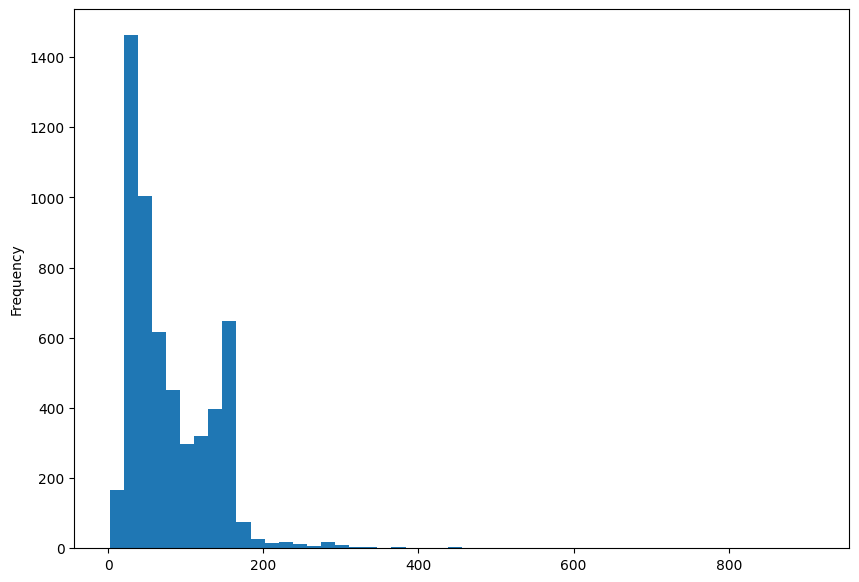

In [68]:
dataset['length'].plot(bins=50,kind='hist',figsize=(10,7))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

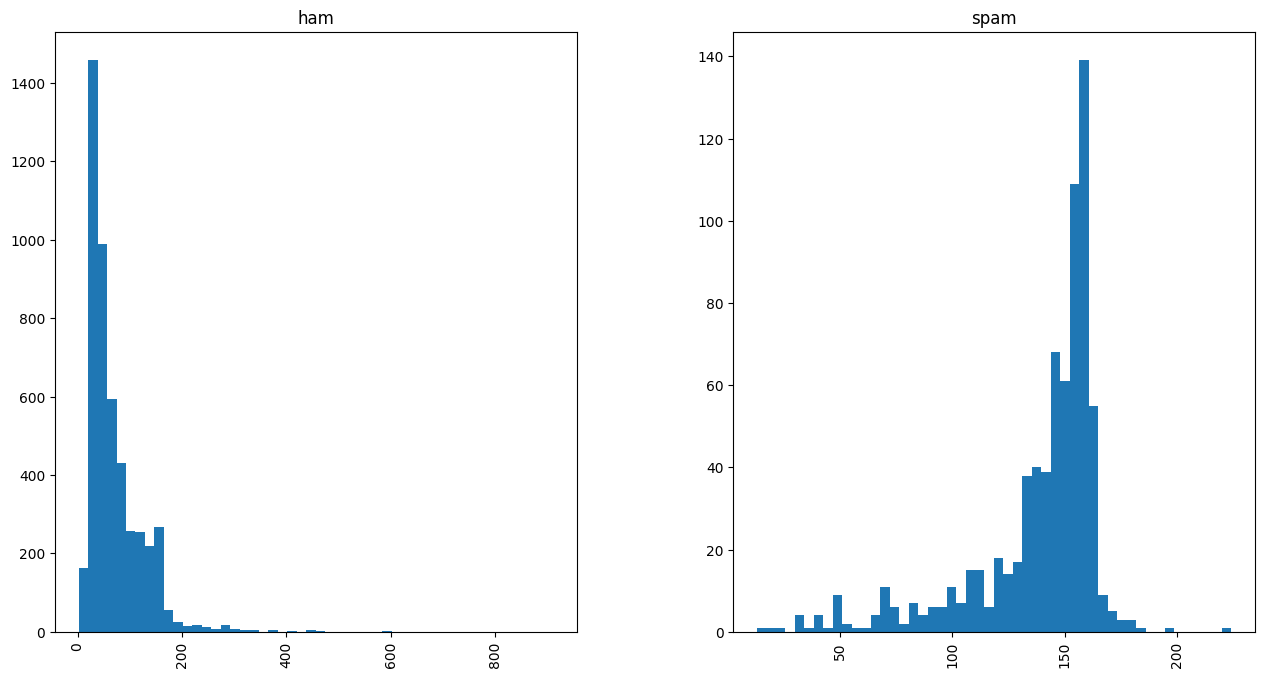

In [70]:
dataset.hist(column='length',by='v1',bins=50,figsize=(15,8))

In [71]:
dataset.loc[:,'v1']=dataset.v1.map({'ham':0,'spam':1})

In [72]:
dataset.head()

,v1,v2,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
x=dataset['v2'].values
y=dataset['v1'].values

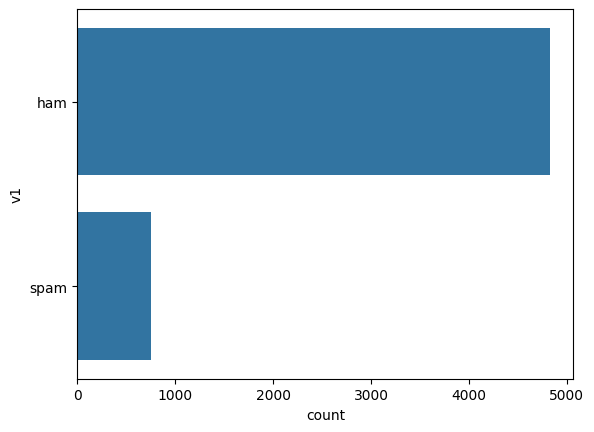

In [11]:
sns.countplot(dataset['v1'])
plt.show()

In [12]:
dataset['v1'].value_counts(normalize=True)

v1
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

In [13]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

In [14]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [15]:
dataset['v2'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [16]:
dataset['v2'][1000]

'No..but heard abt tat..'

In [20]:
import nltk
#nltk.download()

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Hari Preethi
[nltk_data]     .E\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stop_words=stopwords.words('english')

In [24]:
snow=SnowballStemmer('english')

In [29]:
import re
from re import sub



text=[]
for message in dataset['v2']:
    message = message.lower().strip()
    cleaner=re.compile('<.*?>')
    message=sub(cleaner,' ',message)
    message=sub(r"[a^zA-Z0-9]"," ",message)
    message=sub(r'\d+','',message)
    words=[snow.stem(word) for word in message.split() if word not in stopwords.words('english')]
    text.append(' '.join(words))

In [30]:
text[100]

'ok n ur price long leg l! wen c n pick up? u x ms xx'

In [31]:
text[1000]

'no..but rd bt t..'

In [78]:
text[3]

'u dun e rli hor... u c lre dy y...'

In [79]:
text[2]

"free entri wkli comp win f cup fin l tkts st . text f receiv entri question(std txt r te)t&c ppli 's"

In [32]:
text[500]

'fight world e sy, u either win lose bt fightng close u dificult u lose - u lose u win - u still lose.'

In [33]:
count_vect=CountVectorizer(max_features=5000)
bow_data=count_vect.fit_transform(text).toarray()
print(bow_data[1])

[0 0 0 ... 0 0 0]


In [35]:
count_vect.get_feature_names_out()[:10]

array(['____', 'bb', 'bbc', 'bbd', 'bbdelux', 'bbey', 'bbles', 'bbq',
       'bc', 'bck'], dtype=object)

### TF-IDF TECHNIQUES


In [44]:
tf_idataset=TfidfVectorizer()
tf_data=tf_idataset.fit_transform(text).toarray()
tf_data.shape

(5572, 5933)

In [36]:
tf_idf=TfidfVectorizer()
tf_data=tf_idf.fit_transform(text).toarray()
tf_data.shape

(5572, 5933)

In [37]:
tf_idf.get_feature_names_out()[:10]

array(['____', 'bb', 'bbc', 'bbd', 'bbdelux', 'bbey', 'bbles', 'bbq',
       'bc', 'bck'], dtype=object)

In [45]:
tf_idataset.get_feature_names_out()[:10]

array(['____', 'bb', 'bbc', 'bbd', 'bbdelux', 'bbey', 'bbles', 'bbq',
       'bc', 'bck'], dtype=object)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(bow_data,y)

In [39]:
x_train.shape

(4179, 5000)

In [40]:
y_train.shape

(4179,)

In [84]:

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


In [41]:
lr_bow=LogisticRegression(class_weight='balanced')
lr_bow.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [42]:
y_pred=lr_bow.predict(x_test)
print('acc:',accuracy_score(y_test,y_pred))

acc: 0.9798994974874372


In [43]:
print('train-acc:',accuracy_score(y_train,lr_bow.predict(x_train)))

train-acc: 0.9985642498205313


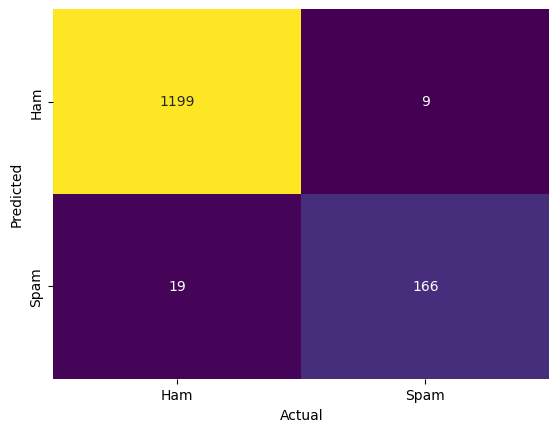

In [47]:
cm=confusion_matrix(y_test,y_pred)
c_dataset=pd.DataFrame(data=cm,columns=['Ham','Spam'],index=['Ham','Spam'])
sns.heatmap(c_dataset,annot=True,cbar=False,fmt='d',cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

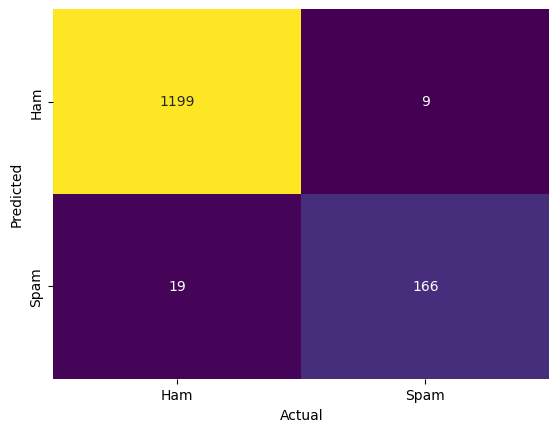

In [48]:
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(data=cm,columns=['Ham','Spam'],index=['Ham','Spam'])
sns.heatmap(c_df,annot=True,cbar=False,fmt='d',cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [49]:
x_train,x_test,y_train,y_test=train_test_split(tf_data,y)

In [50]:
x_train.shape

(4179, 5933)

In [51]:
y_test.shape

(1393,)

In [52]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [53]:
print('acc:',accuracy_score(y_test,y_pred))
print('train-acc:',accuracy_score(y_train,lr.predict(x_train)))

acc: 0.9827709978463748
train-acc: 0.9894711653505623


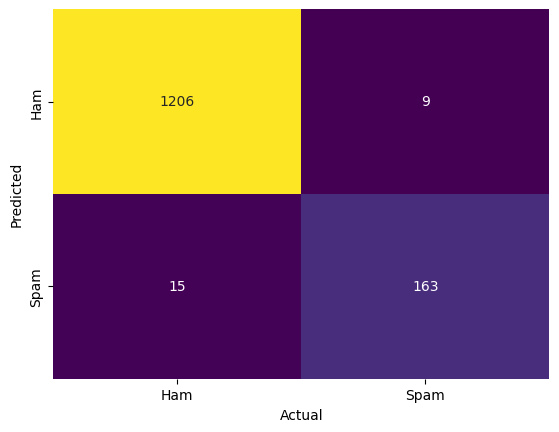

In [54]:
cm=confusion_matrix(y_test,y_pred)
c_dataset=pd.DataFrame(data=cm,columns=['Ham','Spam'],index=['Ham','Spam'])
sns.heatmap(c_dataset,annot=True,cbar=False,fmt='d',cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [55]:
msg='hello how are you I am fine'.lower()

In [56]:
b=count_vect.transform([msg]).toarray()

In [57]:
b.shape

(1, 5000)

In [58]:
lr_bow.predict(b)[0]

'ham'

In [81]:
msg='free entri wkli comp win f cup fin l tkts st . text f receiv entri question(std txt r te)t&c ppli'
b=count_vect.transform([msg]).toarray()
b.shape
lr_bow.predict(b)[0]

'spam'

# THE END
